# **Data Cleaning & Preparation**

### Handling Outlier
### **Target Pertemuan**

<hr>

**Tujuan Instruksional Umum:** Peserta mampu mempersiapkan data untuk pembuatan model machine learning.

**Target Pertemuan:** Peserta mampu mendeteksi dan mengelola data outlier

<hr>

## **Outlier** Handling Outlier Data
### **What is outlier?**

Wikipedia definition,
In statistics, an outlier is an observation point that is distant from other observations.

<img src = "a_img.png" style="width:250px;height:150px"/>

### **How did an outlier introduce to the population?**

* The outliers can be a result of a mistake during data collection
* It can be just an indication of variance in your data.

<img src="b_img.png" style="width:200px;height:150px"/>

### **How to detect outliers?**

1. Standard Deviation
2. Boxplot & IQR Score
3.  Z-Score
* Etc. (DB Scan Clustering, Isolation Forest, Robust Random Cut Forest)

#### **1. Standard Deviation**
In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

Therefore, if you have any data point that is **more than 3 times the standard deviation**, then those points are very likely to be anomalous or **outliers**.

<img src="c_img.png" style="width:400px;height:200px"/>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# multiply and add by random numbers to get some real values
random_data = np.random.randn(500)  * 20 + 20

In [12]:
# Function to Detection Outlier on one-dimentional datasets.
anomalies = []
def find_anomalies(data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(random_data)
# random_data

-38.574866895542804
81.02344230857872


[-43.81319021110137]

In [11]:
data_test = [1,2,300,4,500,6,7,8,9,10]
find_anomalies(data_test)

-406.97986535956505
576.3798653595651


[]

#### **2. Boxplot & IQR**

* Box plots are a graphical depiction of numerical data through their quartiles. 

* The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

<img src="d_img.png" style="width:400px;height:150px"/>

* Interquartile Range (IQR) is important because it is used to define the outliers. 

* It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). 

* Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

<img src="e_img.png" style="width:400px;height:450px"/>


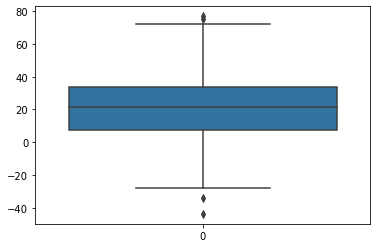

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=random_data)

In [14]:
import numpy as np

list_random_data = random_data.tolist()

Q2 = np.quantile(list_random_data, .50) #median
Q1 = np.quantile(list_random_data, .25)
Q3 = np.quantile(list_random_data, .75)

IQR = (Q3 - Q1) * 1.5
batas_bawah = Q1 - IQR
batas_atas = Q3 + IQR

def find_outlier(yourList):
    outlier = ''
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier = outlier + str(yourList[i]) + ', '
        if yourList[i] < batas_bawah:
            outlier = outlier + str(yourList[i]) + ', '
    return outlier

find_outlier(list_random_data)

'-34.05449301139137, 75.08669931892456, 76.95191601599521, -43.81319021110137, '

In [19]:
random_data = np.random.randn(500)  * 20 + 20
list_coba_coba = [-2000, 1,2,300,4,5,600,7,800,9,100,12,13,15,16,17,120]

def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q2 = np.quantile(yourList, .50) #median
    Q3 = np.quantile(yourList, .75)

    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier = outlier + str(yourList[i]) + ', '
        if yourList[i] < batas_bawah:
            outlier = outlier + str(yourList[i]) + ', '
    return outlier

find_outlier(list_coba_coba)

'-2000, 300, 600, 800, '

#### **3. Z-Score**

* The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured (Wikipedia).

* Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

* While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. 

* In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [23]:
from scipy import stats
import numpy as np
list_random_data = random_data.tolist()
z = np.abs(stats.zscore(list_random_data))

#threshold = 2.5
print(np.where(z > 2.5))

(array([147, 317, 348, 428, 499], dtype=int32),)


In [28]:
# where is the data?
daftar_outlier = [147, 317, 348, 428, 499]

data_outlier = []
for i in range(len(daftar_outlier)):
    data_outlier.append(list_random_data[i])

data_outlier

[30.822246095725625,
 10.078822750174051,
 4.6582684261985445,
 53.33162670250803,
 21.59946350867384]

### **How would we decide, this outliers are important or not?**

* If they are the result of a mistake, then we can ignore them.

* If it is just a variance in the data we would need think a bit further.

<img src="f_img.png" style="width:300px;height:200px"/>

### **Handling Outliers**

* **DROP**: Not a great option. We lose lots of information. Find out if genuine extreme value or broken sensor.
* **MARK**: Safest obtion. We can see if the outliers had an effect.
* **RESCALE**: Log values so outliers don't have as great an effect.

In [29]:
# Load library
import pandas as pd

In [30]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

houses

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


## **Option 1: Drop**

In [31]:
# Drop observations greater than some value
houses_clean = houses[houses['Bathrooms'] < 20]
houses_clean

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


## **Option 2: Mark**

In [5]:
# Load library
import numpy as np

# Create feature based on boolean condition
houses['Outlier'] = np.where(houses['Bathrooms'] < 20, 0, 1)

# Show data
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


## **Option 3: Rescale**

In [6]:
# Log feature
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

# Show data
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


#### **Reference**:
* Natasha Sharma, “Ways to Detect and Remove the Outliers”, https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
* Chris Albon, “Handling Outliers”, https://chrisalbon.com/machine_learning/preprocessing_structured_data/handling_outliers/
* Will Badr, “5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know (Python Code)”, https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623 
